Get all the keys for testing

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
# load up the entries as environment variables
load_dotenv(dotenv_path)
google_key = os.environ.get("google_key")
bing_key = os.environ.get("bing_key")
esri_key = os.environ.get("esri_key")


Auto load the package

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

## load some data

In [4]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/wybert/georouting/main/docs/data/sample_3.csv",index_col=0)
data.head()

,OID_,AHA_ID_lon,AHA_ID_lat,ZIP_lon,ZIP_lat,GIS_ID,Google Map,Bing Map,ESRI,OSRM
6010,3127,-73.916518,42.819978,-72.605400,42.376239,3127,113.433333,109.7667,117.130130,143.996667
5333,988,-72.682788,41.753841,-72.967189,42.293923,988,76.966667,72.7833,84.364337,92.510000
7678,1701,-74.212500,40.709320,-72.585325,42.158520,1701,170.983333,158.2333,194.629965,205.223333


## Test the router API

In [5]:
one_od_pair = data.iloc[2]

In [78]:
origin = [data.iloc[2]["ZIP_lat"],data.iloc[2]["ZIP_lon"]]
destination = [data.iloc[2]["AHA_ID_lat"],data.iloc[2]["AHA_ID_lon"]]

origins = data[['ZIP_lat', 'ZIP_lon']].values.tolist()
destinations = data[['AHA_ID_lat', 'AHA_ID_lon']].values.tolist()

In [65]:
origin

[42.15852, -72.58532499999998]

### ESRI

In [69]:
origin = [45.51238,-122.68782]
destination = [45.522054,-122.690176]

In [79]:
from georouting.routers.esri import EsriRouter
esri_router = EsriRouter(esri_key)
esri_route = esri_router.get_route(origin, destination)
esri_route.get_distance(),esri_route.get_duration()

https://route-api.arcgis.com/arcgis/rest/services/World/Route/NAServer/Route_World/solve?f=json&token=AAPK6211f0834c4a48ae81dd096ecf436087MOOppEbcZsnvSUKvZHrgLN0YGzofNtTRSKegPt8u2CEFnXa_bEWd4GzHw7JUDCAA&stops=-72.585325,42.158520;-74.212500,40.709320&travel_mode=driving&directionsLanguage=en&returnRoutes=true


(273369.9037552283, 11677.797918292983)

In [80]:
gdf = esri_route.get_route_geopandas()
gdf

,geometry,speed (m/s)
0,"LINESTRING (-72.58532 42.15853, -72.58500 42.1...",23.409371


In [64]:
# gdf.explore()

In [81]:
esri_route.plot_route()

why it's in a wrong route

### Google 

In [66]:
from georouting.routers import GoogleRouter
router = GoogleRouter(google_key,mode="driving")
# lat, lon 
route = router.get_route(origin, destination)
route.get_distance(),route.get_duration()

(260171, 10309)

In [67]:
df= route.get_route_geopandas()
df

,distance (m),duration (s),geometry,speed (m/s)
0,30,4,"LINESTRING (-72.58532 42.15852, -72.58520 42.1...",7.500000
1,1146,152,"LINESTRING (-72.58496 42.15851, -72.58504 42.1...",7.539474
2,229,28,"LINESTRING (-72.58001 42.14971, -72.57993 42.1...",8.178571
3,2548,252,"LINESTRING (-72.57958 42.14767, -72.57924 42.1...",10.111111
4,2610,108,"LINESTRING (-72.56706 42.12768, -72.56710 42.1...",24.166667
5,72773,2519,"LINESTRING (-72.59203 42.11373, -72.59216 42.1...",28.889639
6,104221,3734,"LINESTRING (-72.76743 41.53419, -72.76754 41.5...",27.911355
7,17272,677,"LINESTRING (-73.67530 41.03728, -73.67540 41.0...",25.512555
8,4229,182,"LINESTRING (-73.80664 40.93813, -73.80669 40.9...",23.236264
9,3268,153,"LINESTRING (-73.84159 40.92847, -73.84194 40.9...",21.359477


In [68]:
route.plot_route()

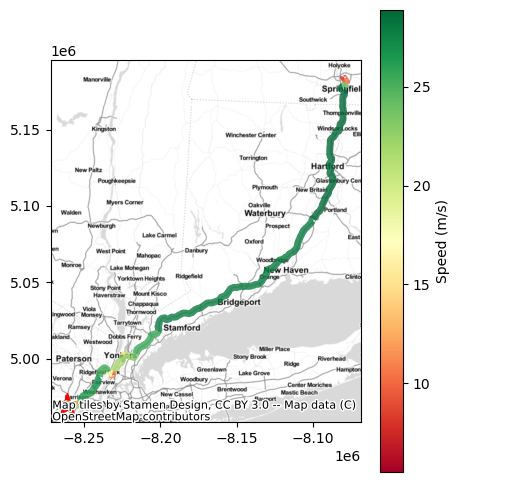

In [53]:
# plot use matplotlib
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(5, 6))
# convert crs so that it can be plotted with contextily
# df = df.to_crs(epsg=3857)

df.plot(ax=ax, column="speed (m/s)",cmap="RdYlGn",legend=True, linewidth=5, alpha=0.8)
# ax.set_title("Route")
# add destination marker, should be the last point of the last line
ax.scatter(df["geometry"].iloc[-1].coords[-1][0],df["geometry"].iloc[-1].coords[-1][1],
            marker="*",s=300,color="red")
# plt.legend(title="Speed (m/s)")
# add colorbar title
cbar = plt.gcf().axes[-1]
cbar.set_ylabel("Speed (m/s)")
# set lim of y axis larger than the original one
# ax.set_ylim(ax.get_ylim()[0]-0.1,ax.get_ylim()[1]+0.1)

# add base map
ctx.add_basemap(ax=ax,source=ctx.providers.Stamen.TonerLite)

plt.show()


In [54]:
# plot use kepler.gl
import keplergl
map = keplergl.KeplerGl(height=600)
map.add_data(data=df,name="route")
map


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'route': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2…

In [58]:
# plot use pydeck
import pydeck as pdk
# convert crs so that it can be plotted with pydeck
df = df.to_crs(epsg=4326)

r= pdk.Deck(
    map_style="mapbox://styles/mapbox/light-v9",
    initial_view_state=pdk.ViewState(
        latitude=one_od_pair["AHA_ID_lat"],
        longitude=one_od_pair["AHA_ID_lon"],
        zoom=10,
        pitch=50,
    ),
    layers=[
        # pdk.Layer(
        #     "ScatterplotLayer",
        #     data=df,
        #     get_position=["lon", "lat"],
        #     get_radius=100,
        #     get_fill_color=[255, 140, 0],
        #     pickable=True,
        #     auto_highlight=True,
        # ),
        pdk.Layer(
            "LineLayer",
            data=df,
            get_source_position=["AHA_ID_lon", "AHA_ID_lat"],
            get_target_position=["ZIP_lon", "ZIP_lat"],
            get_color=[255, 140, 0],
            get_width=5,
        ),
    ],
)

# show the map
r.to_html()

In [13]:
route.plot_route()

### Bing

In [14]:
from georouting.routers import BingRouter
router = BingRouter(bing_key,mode="driving")
# lat, lon
route = router.get_route([one_od_pair["ZIP_lat"],one_od_pair["ZIP_lon"]],
                            [one_od_pair["AHA_ID_lat"],one_od_pair["AHA_ID_lon"]])
route.get_distance(),route.get_duration()

(257420.00000000003, 9590)

In [15]:
df = route.get_route_geopandas()
df

,distance (m),duration (s),geometry,speed (m/s)
0,262.0,47,"LINESTRING (-72.58532 42.15853, -72.58213 42.1...",5.574468
1,119.0,17,"LINESTRING (-72.58213 42.15851, -72.58208 42.1...",7.000000
2,2018.0,206,"LINESTRING (-72.58142 42.15770, -72.58129 42.1...",9.796117
3,2279.0,270,"LINESTRING (-72.58216 42.14001, -72.58218 42.1...",8.440741
4,157.0,18,"LINESTRING (-72.58531 42.12034, -72.58545 42.1...",8.722222
5,815.0,37,"LINESTRING (-72.58513 42.11904, -72.58517 42.1...",22.027027
6,420.0,15,"LINESTRING (-72.59185 42.11386, -72.59213 42.1...",28.000000
7,72334.0,2341,"LINESTRING (-72.59555 42.11128, -72.59581 42.1...",30.898761
8,538.0,23,"LINESTRING (-72.76714 41.53446, -72.76717 41.5...",23.391304
9,48098.0,1576,"LINESTRING (-72.76990 41.53033, -72.76987 41.5...",30.519036


In [16]:
route.plot_route()

### Osrm

In [6]:
from georouting.routers import OSRMRouter
router = OSRMRouter(mode="driving")
# lat, lon
route = router.get_route([one_od_pair["ZIP_lat"],one_od_pair["ZIP_lon"]],
                            [one_od_pair["AHA_ID_lat"],one_od_pair["AHA_ID_lon"]])
route.get_distance(),route.get_duration()


(268234.5, 12313.4)

In [7]:
df = route.get_route_geopandas()
df

,geometry,duration (s),distance (m),speed (m/s)
0,"LINESTRING (-72.58532 42.15852, -72.58523 42.1...",22.6,279.5,12.367257
1,"LINESTRING (-72.58194 42.15850, -72.58194 42.1...",12.3,163.2,13.268293
2,"LINESTRING (-72.58090 42.15734, -72.58092 42.1...",128.2,1929.9,15.053822
3,"LINESTRING (-72.58196 42.14028, -72.58205 42.1...",111.8,1703.5,15.237030
4,"LINESTRING (-72.58437 42.12533, -72.58492 42.1...",98.1,1783.3,18.178389
5,"LINESTRING (-72.59712 42.11339, -72.59724 42.1...",12.7,103.0,8.110236
6,"LINESTRING (-72.59656 42.11267, -72.59674 42.1...",13.3,133.3,10.022556
7,"LINESTRING (-72.59771 42.11183, -72.59759 42.1...",76.6,1328.4,17.342037
8,"LINESTRING (-72.59596 42.10296, -72.59568 42.1...",1220.5,27173.1,22.263908
9,"LINESTRING (-72.65568 41.88683, -72.65583 41.8...",603.3,13066.9,21.659042


In [9]:
route.plot_route()

## Test the travel matrix API

In [39]:
origins = data[['ZIP_lat', 'ZIP_lon']].values.tolist()
destinations = data[['AHA_ID_lat', 'AHA_ID_lon']].values.tolist()
origins

[[42.376239033, -72.605400453],
 [42.293923206, -72.967189321],
 [42.15852, -72.58532499999998]]

In [48]:
origins = data[['ZIP_lat', 'ZIP_lon']].values
destinations = data[['AHA_ID_lat', 'AHA_ID_lon']].values
origins


array([[ 42.37623903, -72.60540045],
       [ 42.29392321, -72.96718932],
       [ 42.15852   , -72.585325  ]])

### Google

why it not working with array?

In [50]:
from georouting.routers import GoogleRouter
router = GoogleRouter(google_key,mode="driving")
google_distance_matrix = router.get_distance_matrix(origins,destinations,append_od=True)
google_distance_matrix["speed (m/s)"] = google_distance_matrix["distance (m)"]/google_distance_matrix["duration (s)"]
google_distance_matrix

,orgin_lat,orgin_lon,destination_lat,destination_lon,distance (m),duration (s),speed (m/s)
0,42.376239,-72.605400,42.819978,-73.916518,185256,6810,27.203524
1,42.376239,-72.605400,41.753841,-72.682788,83746,3293,25.431521
2,42.376239,-72.605400,40.709320,-74.212500,291295,11178,26.059671
3,42.293923,-72.967189,42.819978,-73.916518,126424,5345,23.652760
4,42.293923,-72.967189,41.753841,-72.682788,83188,4618,18.013859
5,42.293923,-72.967189,40.709320,-74.212500,272316,11593,23.489692
6,42.158520,-72.585325,42.819978,-73.916518,161588,5974,27.048544
7,42.158520,-72.585325,41.753841,-72.682788,52526,2397,21.913225
8,42.158520,-72.585325,40.709320,-74.212500,260074,10281,25.296566


### Bing

There are no units identified in the response. can we specify the units from it's API?

In [51]:
from georouting.routers import BingRouter
router = BingRouter(bing_key,mode="driving")
bing_distance_matrix = router.get_distance_matrix(origins,destinations,append_od=True)
bing_distance_matrix["speed (m/s)"] = bing_distance_matrix["distance (m)"]/bing_distance_matrix["duration (s)"]
bing_distance_matrix

,orgin_lat,orgin_lon,destination_lat,destination_lon,distance (m),duration (s),speed (m/s)
0,42.376239,-72.605400,42.819978,-73.916518,185328.0,6586,28.139690
1,42.376239,-72.605400,41.753841,-72.682788,83683.0,3257,25.693276
2,42.376239,-72.605400,40.709320,-74.212500,289202.0,10334,27.985485
3,42.293923,-72.967189,42.819978,-73.916518,127213.0,5339,23.827121
4,42.293923,-72.967189,41.753841,-72.682788,98596.0,4367,22.577513
5,42.293923,-72.967189,40.709320,-74.212500,271090.0,11107,24.407131
6,42.158520,-72.585325,42.819978,-73.916518,161978.0,5747,28.184792
7,42.158520,-72.585325,41.753841,-72.682788,51901.0,2417,21.473314
8,42.158520,-72.585325,40.709320,-74.212500,257420.0,9494,27.113967


### Osrm

In [52]:
from georouting.routers import OSRMRouter
router = OSRMRouter(mode="driving")
osrm_distance_matrix = router.get_distance_matrix(origins,destinations,append_od=True)
osrm_distance_matrix["speed (m/s)"] = osrm_distance_matrix["distance (m)"]/osrm_distance_matrix["duration (s)"]
osrm_distance_matrix

,orgin_lat,orgin_lon,destination_lat,destination_lon,distance (m),duration (s),speed (m/s)
0,42.376239,-72.605400,42.819978,-73.916518,185141.8,8639.8,21.428945
1,42.376239,-72.605400,41.753841,-72.682788,82634.6,4058.1,20.362879
2,42.376239,-72.605400,40.709320,-74.212500,300008.0,13819.9,21.708406
3,42.293923,-72.967189,42.819978,-73.916518,126934.5,6829.4,18.586479
4,42.293923,-72.967189,41.753841,-72.682788,90821.8,5550.6,16.362519
5,42.293923,-72.967189,40.709320,-74.212500,265710.3,13736.9,19.342814
6,42.158520,-72.585325,42.819978,-73.916518,161791.8,7416.9,21.813938
7,42.158520,-72.585325,41.753841,-72.682788,50861.2,2551.6,19.933062
8,42.158520,-72.585325,40.709320,-74.212500,268234.5,12313.4,21.783951


### Compare the results

In [27]:
results = pd.merge(google_distance_matrix,bing_distance_matrix,on=["orgin_lat","orgin_lon","destination_lat","destination_lon"],suffixes=("_google","_bing"))
results = pd.merge(results,osrm_distance_matrix,on=["orgin_lat","orgin_lon","destination_lat","destination_lon"],suffixes=("","_osrm"))
results

,orgin_lat,orgin_lon,destination_lat,destination_lon,distance (m)_google,duration (s)_google,speed (m/s)_google,distance (m)_bing,duration (s)_bing,speed (m/s)_bing,distance (m),duration (s),speed (m/s)
0,42.376239,-72.605400,42.819978,-73.916518,185256,6810,27.203524,185328.0,6586,28.139690,185141.8,8639.8,21.428945
1,42.376239,-72.605400,41.753841,-72.682788,83746,3293,25.431521,83683.0,3257,25.693276,82634.6,4058.1,20.362879
2,42.376239,-72.605400,40.709320,-74.212500,291295,11178,26.059671,289202.0,10334,27.985485,300008.0,13819.9,21.708406
3,42.293923,-72.967189,42.819978,-73.916518,126424,5345,23.652760,127213.0,5339,23.827121,126934.5,6829.4,18.586479
4,42.293923,-72.967189,41.753841,-72.682788,83188,4618,18.013859,98596.0,4367,22.577513,90821.8,5550.6,16.362519
5,42.293923,-72.967189,40.709320,-74.212500,272316,11593,23.489692,271090.0,11107,24.407131,265710.3,13736.9,19.342814
6,42.158520,-72.585325,42.819978,-73.916518,161588,5974,27.048544,161978.0,5747,28.184792,161791.8,7416.9,21.813938
7,42.158520,-72.585325,41.753841,-72.682788,52526,2397,21.913225,51901.0,2417,21.473314,50861.2,2551.6,19.933062
8,42.158520,-72.585325,40.709320,-74.212500,260074,10281,25.296566,257420.0,9494,27.113967,268234.5,12313.4,21.783951


In [33]:
# plot the speed line chart
temp = results[["speed (m/s)_google","speed (m/s)_bing","speed (m/s)"]]
temp.sort_values(by="speed (m/s)_google",inplace=True)
temp

/var/folders/f0/xl6nrz1n02bd52xdnrwb70w80000gn/T/ipykernel_4525/1769038254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.sort_values(by="speed (m/s)_google",inplace=True)


,speed (m/s)_google,speed (m/s)_bing,speed (m/s)
4,18.013859,22.577513,16.362519
7,21.913225,21.473314,19.933062
5,23.489692,24.407131,19.342814
3,23.652760,23.827121,18.586479
8,25.296566,27.113967,21.783951
1,25.431521,25.693276,20.362879
2,26.059671,27.985485,21.708406
6,27.048544,28.184792,21.813938
0,27.203524,28.139690,21.428945


## Test travel distance batch API

In [25]:
orgins = data[['ZIP_lat', 'ZIP_lon']].values
destinations = data[['AHA_ID_lat', 'AHA_ID_lon']].values

### Google

In [29]:
from georouting.routers import GoogleRouter
router = GoogleRouter(google_key,mode="driving")
google_distances = router.get_distances_batch(orgins,destinations,append_od=True)
google_distances


,origin_lat,origin_lon,destination_lat,destination_lon,distance (m),duration (s)
0,42.376239,-72.605400,42.819978,-73.916518,185256,6810
0,42.293923,-72.967189,41.753841,-72.682788,83188,4618
0,42.158520,-72.585325,40.709320,-74.212500,260074,10281


### Bing

In [30]:
from georouting.routers import BingRouter
router = BingRouter(bing_key,mode="driving")
bing_distances = router.get_distances_batch(orgins,destinations,append_od=True)
bing_distances

,origin_lat,origin_lon,destination_lat,destination_lon,distance (m),duration (s)
0,42.376239,-72.605400,42.819978,-73.916518,185328.0,6586
0,42.293923,-72.967189,41.753841,-72.682788,98596.0,4367
0,42.158520,-72.585325,40.709320,-74.212500,257420.0,9494


### OSRM

In [39]:
from georouting.routers import OSRMRouter
router = OSRMRouter(mode="driving")
osrm_distances = router.get_distances_batch(orgins,destinations,append_od=True)
osrm_distances

,origin_lat,origin_lon,destination_lat,destination_lon,distance (m),duration (s)
0,42.376239,-72.605400,42.819978,-73.916518,185141.8,8639.8
0,42.293923,-72.967189,41.753841,-72.682788,90821.8,5550.6
0,42.158520,-72.585325,40.709320,-74.212500,268234.5,12313.4


TODO: we should add limitation to the documntation
we should add the limitation for each request